# Introduction to Mathematical Modeling

Welcome to this Jupyter notebook on **Introduction to Mathematical Modeling**. 
In this notebook, we will:
1. Understand what mathematical modeling is and why it is important.
2. Review basic steps in modeling.
3. Explore population models (e.g., exponential growth, logistic growth).
4. Explore infection models (e.g., SI and SIR models).
5. Solve and visualize these models using Python code.

---

## 1. What is Mathematical Modeling?

Mathematical modeling is the process of using mathematical tools and ideas to understand, 
explain, or predict real-world phenomena. Key steps include:
- Identifying the problem or question in a real-world situation.
- Translating that problem into mathematical language (i.e., forming equations).
- Making reasonable assumptions and simplifications.
- Solving or simulating the resulting equations.
- Validating the results against real-world data or observations.
- Iterating the process to refine the model.

Mathematical modeling is central to understanding industrial processes, population growth, 
disease spread, financial calculations, and more.

---

## 2. Basic Steps in Modeling

A common workflow for mathematical modeling:

1. **Problem Identification**  
   Understand what real-world process or phenomenon you want to study. Clearly state the 
   question the model should answer.

2. **Model Formulation**  
   Translate the problem into mathematical terms. This often involves identifying the 
   variables, parameters, and relationships (e.g., differential equations).

3. **Model Reduction**  
   Make reasonable assumptions or simplifications (e.g., ignore very small effects, assume 
   constants, or homogeneous mixing, etc.) to keep the model tractable.

4. **Model Analysis**  
   Analyze or solve the resulting mathematical equations. This may involve analytical or 
   numerical techniques.

5. **Computation**  
   Implement numerical simulations, use computational tools to solve or approximate solutions 
   if analytical solutions are difficult.

6. **Model Validation**  
   Compare the model’s predictions to real-world data or observations. Adjust assumptions 
   and parameters as needed.

---

## 3.1 Exponential Growth Model

**Key Idea**: In the simplest case, a population grows at a rate proportional to its current 
size. If $( P(t) )$ denotes the population at time $( t )$, then

$[
\frac{dP}{dt} = rP(t),
]$

where 
- $( r )$ is a constant growth rate (relative growth rate),
- $( P(t) )$ is assumed to be differentiable and continuous.

The solution is 

$[
P(t) = P(t_0) e^{r(t - t_0)}
]$

where $( P(t_0) )$ is the initial population at time $( t_0 )$.

**Interpretation**:
- If $( r > 0 )$, the population grows exponentially.
- If $( r < 0 )$, the population decays exponentially.
- If $( r = 0 )$, the population stays constant.

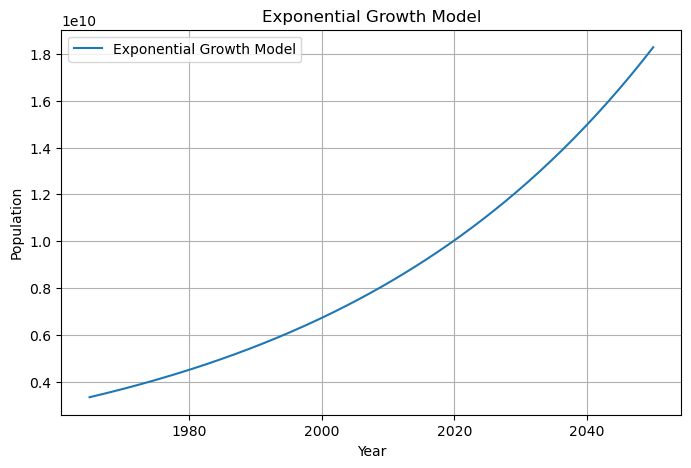

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
r = 0.02        # growth rate, e.g. 2% per year
P0 = 3.34e9     # initial population (example: 3.34 billion)
t0 = 1965       # initial time
t_end = 2050    # end time
num_points = 200

# Time array
t = np.linspace(t0, t_end, num_points)

# Exponential Growth Model
P = P0 * np.exp(r * (t - t0))

# Plot
plt.figure(figsize=(8,5))
plt.plot(t, P, label='Exponential Growth Model')
plt.title('Exponential Growth Model')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()

In this example, we assume a constant relative growth rate of <code>2%</code> per year.  
We start with a population of <code>3.34 billion</code> in <code>1965</code>. The model predicts population growth  
into the future. Of course, real data may deviate for various reasons (e.g., resource limits).

----

## 3.2 Logistic Growth Model

**Key Idea**: Real populations cannot grow indefinitely due to resource limitations. The 
**carrying capacity**, $( K )$, represents the maximum population the environment can sustain. 
The **logistic model** modifies the exponential model by introducing a feedback term:

$[
\frac{dP}{dt} = r P(t) \left(1 - \frac{P(t)}{K}\right)
]$

- $( r )$ is the intrinsic growth rate.
- $( K )$ is the carrying capacity.

The solution to this logistic equation is

$[
P(t) = \frac{P_0 \, K}{P_0 + \bigl(K - P_0\bigr) e^{-r(t - t_0)}}.
]$

**Behavior**:
- If $( P_0 < K )$, the population grows initially and levels off at $( K )$.
- If $( P_0 > K )$, the population decreases to $( K )$.
- As $( t \to \infty )$, $( P(t) \to K )$.

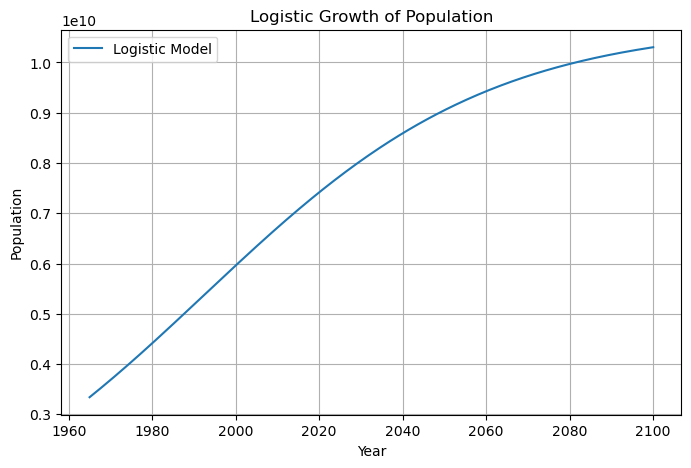

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def logistic_model(P, t, r, K):
    """
    Returns dP/dt for the logistic model.
    P: population at time t
    t: time
    r: intrinsic growth rate
    K: carrying capacity
    """
    return r * P * (1 - P/K)

# Parameters
r = 0.029            # growth rate
K = 10.76e9          # carrying capacity (example)
P0 = 3.34e9          # initial population
t0 = 1965            # initial time
t_end = 2100
num_points = 300

# Time array
t = np.linspace(t0, t_end, num_points)

# Solve ODE
solution = odeint(logistic_model, P0, t, args=(r, K))

# Plot
plt.figure(figsize=(8,5))
plt.plot(t, solution, label='Logistic Model')
plt.title('Logistic Growth of Population')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()

This code numerically solves the logistic equation using `scipy.integrate.odeint`. The solution 
shows that as time increases, the population approaches the carrying capacity \(K\).

---

## 4.1 SI Model

We now shift to modeling **disease spread**. 
**Key Assumption**: Once a susceptible (healthy) individual becomes infected, 
they stay infected forever.

Let:
- $( S(t) )$ = number of susceptible individuals at time $( t )$,
- $( I(t) )$ = number of infected individuals at time $( t )$,
- $( N = S(t) + I(t) )$ = total population (assumed constant).

**Mass Action Incidence**: 
$[
\frac{dS}{dt} = -\beta S I, 
\quad
\frac{dI}{dt} = \beta S I,
]$
where $( \beta )$ is the infection rate (combining contact rate and transmission risk).

**Interpretation**:
- As $( S )$ decreases, $( I )$ increases.
- Eventually, $( S(t) )$ may approach $( 0 )$ (everyone becomes infected).

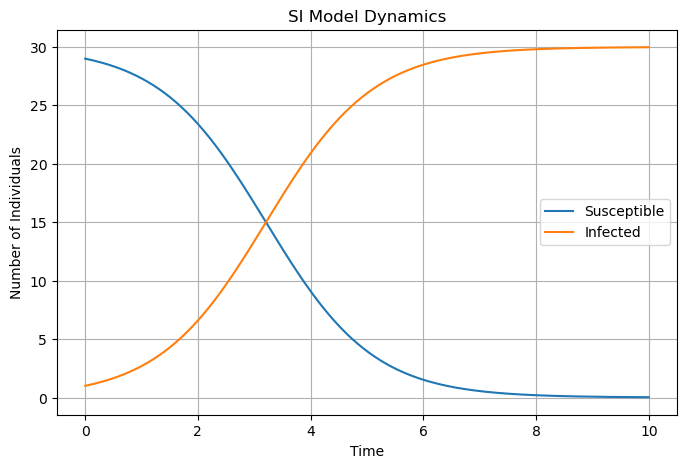

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def si_model(y, t, beta, N):
    """
    SI model differential equations:
    y = [S, I]
    """
    S, I = y
    dSdt = -beta * S * I
    dIdt = beta * S * I
    return [dSdt, dIdt]

# Parameters
N = 30             # total population
I0 = 1             # initial number of infected
S0 = N - I0        # initial number of susceptibles
beta = 0.035       # infection rate

t = np.linspace(0, 10, 200)   # time from 0 to 10 (arbitrary units)

# Solve ODE
initial_conditions = [S0, I0]
solution = odeint(si_model, initial_conditions, t, args=(beta, N))
S_sol, I_sol = solution.T

# Plot
plt.figure(figsize=(8,5))
plt.plot(t, S_sol, label='Susceptible')
plt.plot(t, I_sol, label='Infected')
plt.title('SI Model Dynamics')
plt.xlabel('Time')
plt.ylabel('Number of Individuals')
plt.legend()
plt.grid(True)
plt.show()

From the plots, the susceptible population \( S(t) \) decreases towards zero, while the infected 
population \( I(t) \) grows and approaches \( N \).

---

## 4.2 SIR Model

A more **realistic** disease model includes recovery or removal. 
Thus, individuals move from **Susceptible** (S) to **Infected** (I) to **Recovered/Removed** (R).

$[
\begin{aligned}
\frac{dS}{dt} &= -\beta S I,\\
\frac{dI}{dt} &= \beta S I - \mu I,\\
\frac{dR}{dt} &= \mu I,
\end{aligned}
]$

where 
- $( \beta )$ is the infection (transmission) rate, 
- $( \mu )$ is the recovery rate ($( 1/\mu )$ is the mean infectious period),
- $( N = S + I + R )$ is constant (no births/deaths in the simplest version).

**Interpretation**:
- A fraction of susceptible individuals becomes infected at a rate proportional to $( \beta S I)$.
- Infected individuals recover at rate $( \mu I)$ and move into $(R)$.
- Once recovered, individuals are immune and no longer susceptible or infectious.

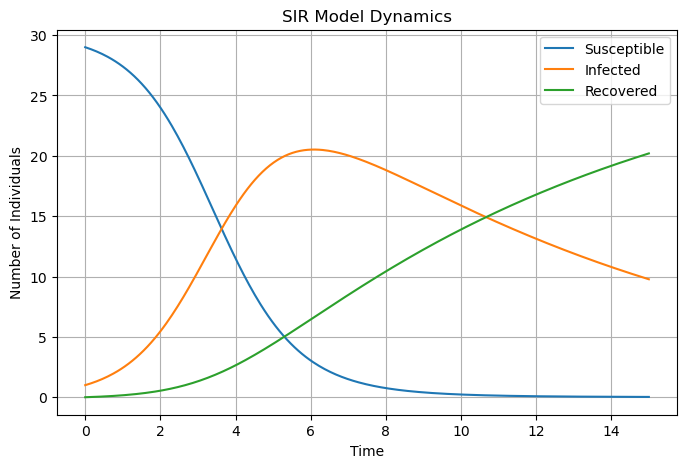

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def sir_model(y, t, beta, mu):
    """
    SIR model differential equations:
    y = [S, I, R]
    """
    S, I, R = y
    dSdt = -beta * S * I
    dIdt = beta * S * I - mu * I
    dRdt = mu * I
    return [dSdt, dIdt, dRdt]

# Parameters
beta = 0.035   # infection/transmission rate
mu = 0.1       # recovery rate
N = 30         # total population

# Initial Conditions
S0 = 29   # initially susceptible
I0 = 1    # initially infected
R0 = 0    # initially recovered

y0 = [S0, I0, R0]

# Time array
t = np.linspace(0, 15, 300)

# Solve the SIR system
solution = odeint(sir_model, y0, t, args=(beta, mu))
S_sol, I_sol, R_sol = solution.T

# Plot
plt.figure(figsize=(8,5))
plt.plot(t, S_sol, label='Susceptible')
plt.plot(t, I_sol, label='Infected')
plt.plot(t, R_sol, label='Recovered')
plt.title('SIR Model Dynamics')
plt.xlabel('Time')
plt.ylabel('Number of Individuals')
plt.legend()
plt.grid(True)
plt.show()

In this SIR model simulation:
- We start with 29 susceptible, 1 infected, and 0 recovered.
- Over time, $( I(t) )$ initially rises but eventually decreases as people recover and move 
  into $( R )$.
- The curve for $( R(t) )$ is monotonic (it only goes up).
- The curve for $( S(t) )$ is monotonic (it only goes down).

Adjusting $(\beta)$ and $(\mu)$ will change the dynamics substantially, e.g., how quickly the 
infection spreads, how high the peak of $( I(t) )$ is, and how quickly individuals recover.

---

## 5. Model with Birth and Death

In some settings, we must also account for natural births and deaths, or immigration/emigration. 
For example, consider a population of healthy people $( P(t) )$ and infected people $( I(t) )$ 
such that:

$
\begin{aligned}
\frac{dP}{dt} &= \alpha P \left(1 - \frac{P}{K}\right) - \beta P I, \\
\frac{dI}{dt} &= \beta P I - \rho I,
\end{aligned}
$

where
- $( \alpha )$ is the intrinsic growth rate of the healthy population,
- $( K )$ is the carrying capacity for the healthy population,
- $( \beta )$ is the infection rate,
- $( \rho )$ is the recovery or removal rate of infected individuals.

Here we combine logistic growth for the healthy population with infection dynamics.

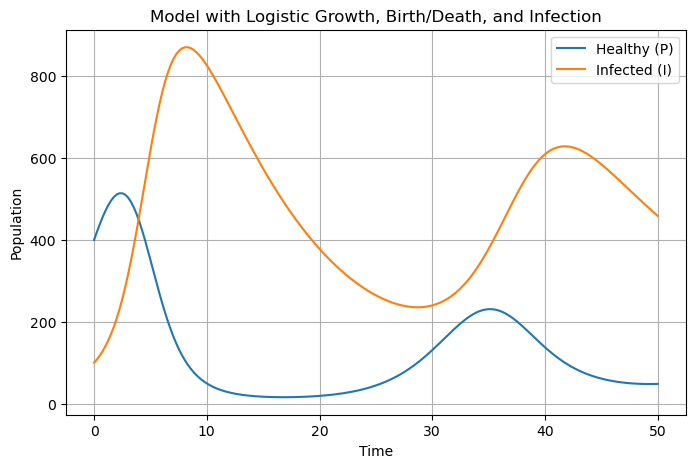

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def birth_death_infection_model(y, t, alpha, K, beta, rho):
    """
    y = [P, I]
    """
    P, I = y
    dPdt = alpha * P * (1 - P/K) - beta * P * I
    dIdt = beta * P * I - rho * I
    return [dPdt, dIdt]

# Parameters
alpha = 0.5
K = 1000
beta = 0.001
rho = 0.1

# Initial Conditions
N = 500          # total initial population
I_init = N/5.0   # 1/5 infected
P_init = N - I_init
y0 = [P_init, I_init]

# Time span
t = np.linspace(0, 50, 200)

# Solve ODE
solution = odeint(birth_death_infection_model, y0, t, args=(alpha, K, beta, rho))
P_sol, I_sol = solution.T

# Plot results
plt.figure(figsize=(8,5))
plt.plot(t, P_sol, label='Healthy (P)')
plt.plot(t, I_sol, label='Infected (I)')
plt.title('Model with Logistic Growth, Birth/Death, and Infection')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()

Depending on parameter choices, the healthy population $( P(t) )$ may stabilize under logistic 
growth if the infection does not overpower it. Meanwhile, the infected population $( I(t) )$ 
may grow or decline depending on the balance between infection rate ($(\beta)$) and the 
recovery rate ($(\rho)$).

---

## 6. Exercises

1. **Analytical & Numerical Solutions**  
   - Solve the logistic equation analytically and compare with a numerical solution (using 
     `odeint`).
   - Experiment with different initial conditions $( P_0 )$ and see how it affects the solution.

2. **Adding Vaccination to the SIR Model**  
   - Extend the SIR model to include a vaccination rate $( \nu P )$. How does this affect 
     the final size of the epidemic?

3. **Exploring Contact Rate**  
   - In reality, contact rate may depend on population size (mass action) or remain nearly 
     constant (standard incidence). Compare the two assumptions by modifying the code 
     for SI or SIR models.

4. **Discreteness of Population**  
   - Reflect on why we can use continuous methods (differential equations) for inherently 
     discrete processes. Under what circumstances is it reasonable to treat a population 
     or infection count as continuous?

---

## Final Notes

This notebook illustrates various fundamental concepts 
in Mathematical Modeling, including:
- Exponential growth and logistic growth for populations,
- Basic infection models (SI, SIR),
- Models that incorporate birth, death, and infection.

You can refine or extend these models to suit more complex or realistic situations, 
including additional compartments, time delays, stochastic effects, or spatial spread.

---

**References and Acknowledgements**:
- Inspired by standard textbook treatments of Mathematical Modeling in Population Dynamics 
  and Epidemiology.
- See also the works by Kermack and McKendrick on early SIR models, as well as advanced 
  literature on industrial mathematics for practical examples of real-world modeling.

---